In [12]:
import numpy as np
from functools import partial

from laws.exponential_law import generate_exponential_law, exponential_probability
from general_stats import perform_chi2_test

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
# N = int(input("Entrer N, le nombre de 'tirages'"))
N = 1000

In [14]:
U = np.random.uniform(size=N)

In [15]:
lamb = 2
exponential_values = generate_exponential_law(lamb, U)

(10.04578776655695, 9)


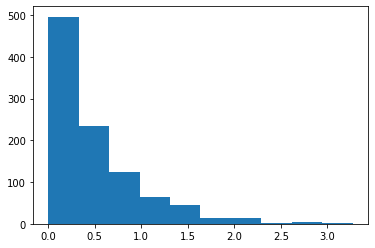

In [16]:
chi2, empirical_values, expected_values, bins = perform_chi2_test(exponential_values, partial(exponential_probability, lamb))

print(chi2)

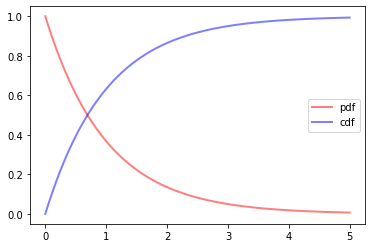

In [17]:
def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the exponential distribution function for a given x range
    If mu and sigma are not provided, standard exponential is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = stats.expon.cdf(x, mu, sigma)
    else:
        y = stats.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

# y_theoretical = lamb * np.exp(-lamb * x)
# or via the library:
# y_theoretical = scipy.stats.expon.pdf(x, 0, 1)

# Y = 1 - np.exp(-lamb * x)

x = np.linspace(0, 5, N)

plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
# plt.plot(x, exponential_values, label='empirical')
plt.legend()
